<a href="https://colab.research.google.com/github/Antramos/TextMiningProject2025/blob/main/main_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install wordcloud #Install it if needed

In [ ]:
!pip install nltk

In [ ]:
!git clone https://github.com/Antramos/TextMiningProject2025.git
%cd TextMiningProject2025


Cloning into 'TextMiningProject2025'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 2.40 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/TextMiningProject2025


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import t_min_prj_lib as prjlib # Project Lib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!ls


 main.ipynb			  'Project Macro Structure.jpg'   README.md   t_min_prj_lib.py
'Project Handout TM 2025 v2.pdf'   __pycache__			  test.csv    train.csv


# 1. EDA

## 1.1 Loading Datasets

Datasets are comma delimiter csv's but we found out that there are commas in train.csv "text" inside the "text" field. Anyway, using Pandas PD, the issue was resolved.

In [ ]:
ds_train = pd.read_csv("train.csv")

In [ ]:
ds_train.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [ ]:
ds_train['label'].value_counts()

,count
label,
2,6178
1,1923
0,1442


In [ ]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


#### Loading and checking test.csv too

In [ ]:
ds_test = pd.read_csv("test.csv")

In [ ]:
ds_test.head(5)

,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Here’s What Hedge Funds Think Evolution Petrol...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: “When growth is scarce, investors s..."


## 1.2 Train Dataset Distribution

#### Plotting train dataset distribution

In [ ]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2388 non-null   int64 
 1   text    2388 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.4+ KB


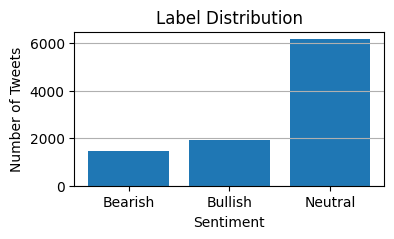

In [ ]:
label_counts = ds_train["label"].value_counts().sort_index()
label_names = {0: "Bearish", 1: "Bullish", 2: "Neutral"}

plt.figure(figsize=(4, 2))
plt.bar(label_names.values(), label_counts)
plt.title("Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis="y")
plt.show()


» train.csv is very imbalanced, with huge <b>Neural</b> predomination over <b>Bearish</b> and <b>Bullisth</b>.  

Due to strong class imbalance, we will apply class_weight='balanced' during model training and evaluate performance using macro-averaged precision, recall, and F1-score. For traditional models, we will also experiment with oversampling the minority classes.

## 1.3 Clean text procedures

#### Basic pre-processing with "eda_clean_text" (project lib)

In [ ]:
ds_train["clean_text"] = ds_train["text"].apply(prjlib.eda_clean_text)

In [ ]:
ds_train["clean_text"].head()

,clean_text
0,jpmorgan reels in expectations on beyond meat
1,nomura points to bookings weakness at carnival...
2,cemex cut at credit suisse jp morgan on weak b...
3,btig research cuts to neutral
4,funko slides after piper jaffray pt cut


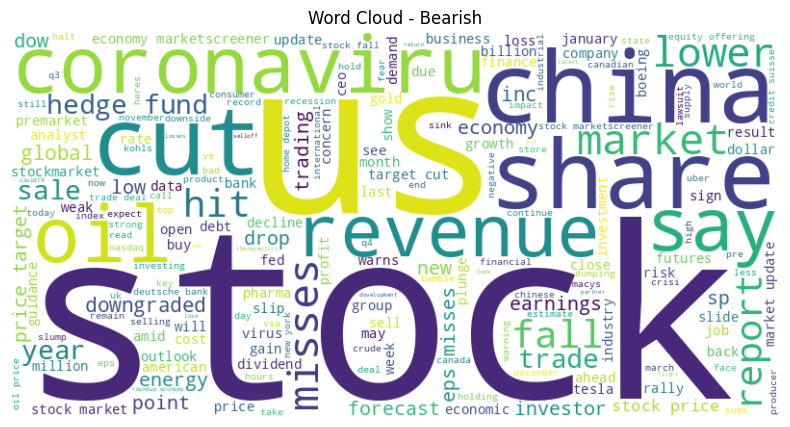

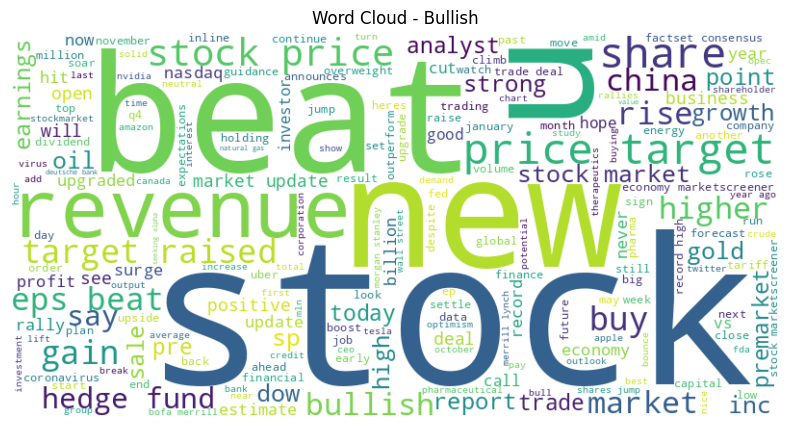

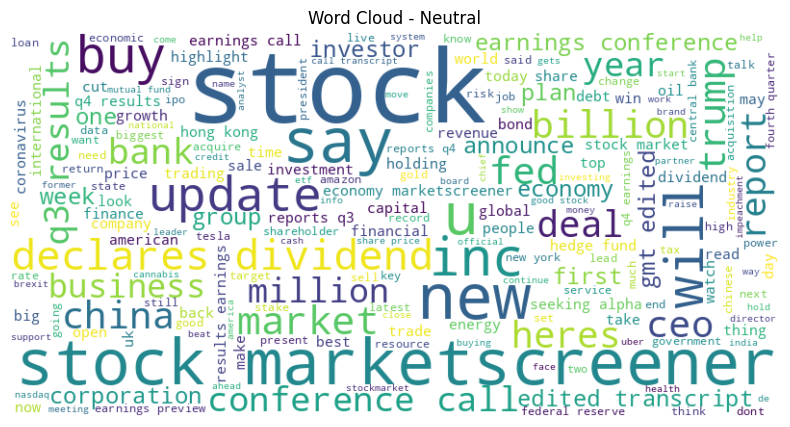

In [ ]:
for label in [0, 1, 2]:
    subset = ds_train[ds_train["label"] == label]
    text = " ".join(subset["clean_text"])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label_names[label]}")
    plt.show()


## 1.4 Tweets Length and Word Distribution

If most tweets are short (less then 50 tokens), simpler models like BoW may be sufficient. If some are near the 280-char limit, LSTMs or BERT will be better.

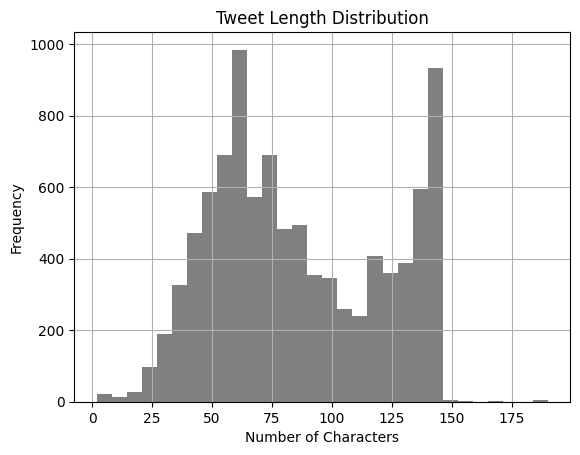

In [ ]:
ds_train["text_length"] = ds_train["text"].apply(len)

plt.hist(ds_train["text_length"], bins=30, color="gray")
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

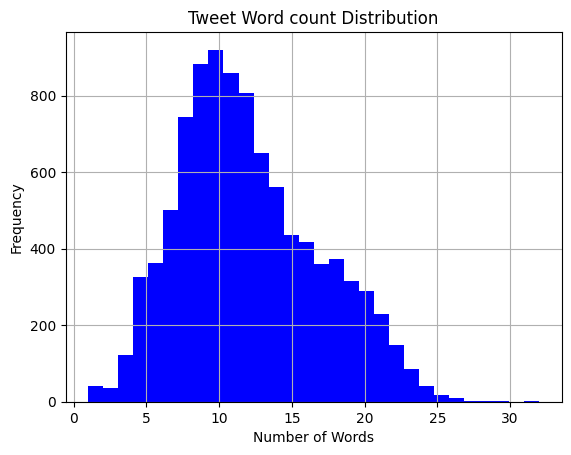

In [ ]:
ds_train["text_words"] = ds_train["text"].apply(lambda x: len(x.split()))

plt.hist(ds_train["text_words"], bins=30, color="blue")
plt.title("Tweet Word count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Apply to your DataFrame
ds_train["clean_text"] = ds_train["text"].apply(prjlib.preprocess)

# Peek at the results
ds_train[["text", "clean_text"]].head()

,text,clean_text
0,$BYND - JPMorgan reels in expectations on Beyo...,ticker jpmorgan reel expectation beyond meat
1,$CCL $RCL - Nomura points to bookings weakness...,ticker ticker nomura point booking weakness ca...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",ticker cemex cut credit suisse jp morgan weak ...
3,$ESS: BTIG Research cuts to Neutral https://t....,ticker btig research cut neutral
4,$FNKO - Funko slides after Piper Jaffray PT cu...,ticker funko slide piper jaffray pt cut


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


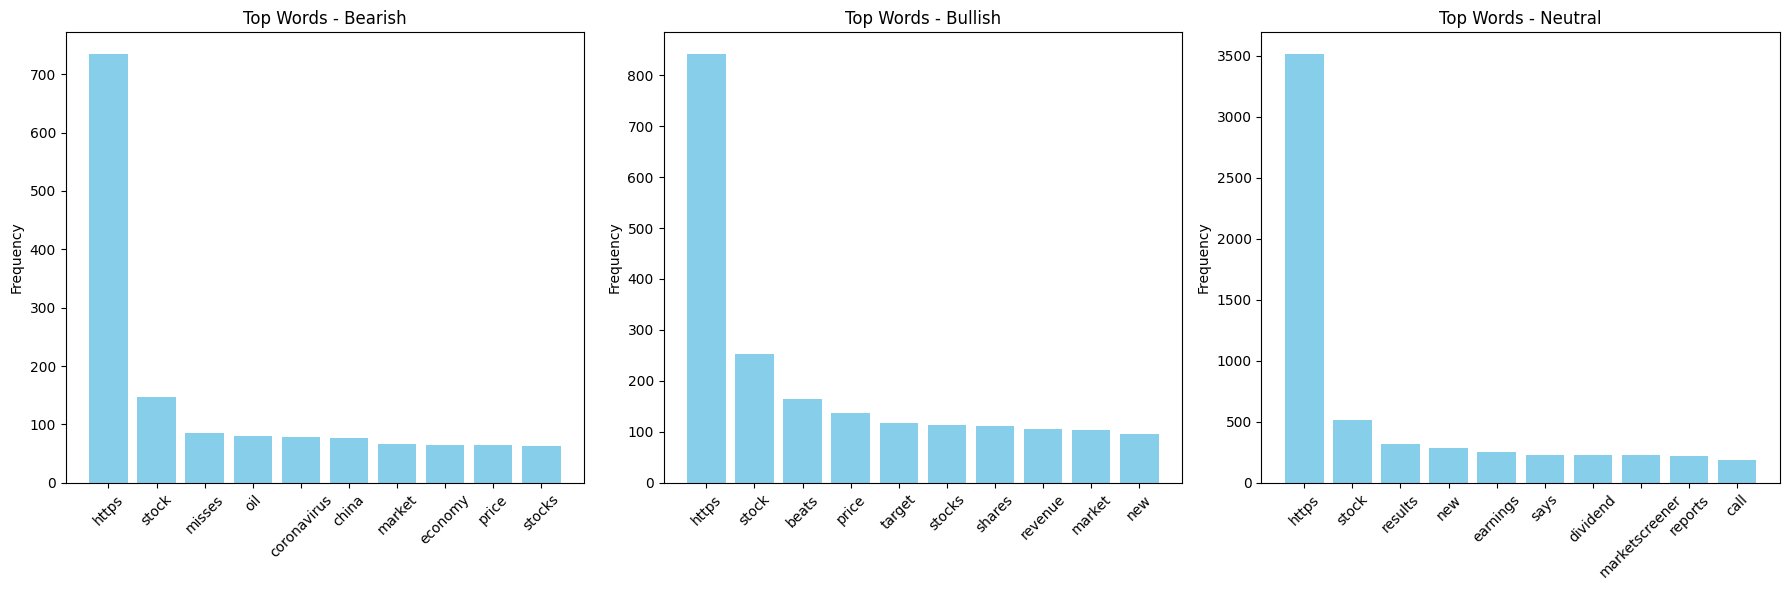

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Ensure you have downloaded required NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset (adjust the path as needed)
df = pd.read_csv("train.csv")  # The CSV should contain 'text' and 'label' columns

# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

# Apply preprocessing
df['tokens'] = df['text'].apply(preprocess)

# Function to get top N words for each sentiment
def top_words_by_sentiment(df, sentiment_label, top_n=10):
    all_words = [word for tokens in df[df['label'] == sentiment_label]['tokens'] for word in tokens]
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = {0: "Bearish", 1: "Bullish", 2: "Neutral"}

for i, sentiment in enumerate(sentiments):
    top_words = top_words_by_sentiment(df, sentiment)
    words, freqs = zip(*top_words)
    axes[i].bar(words, freqs, color='skyblue')
    axes[i].set_title(f"Top Words - {sentiments[sentiment]}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


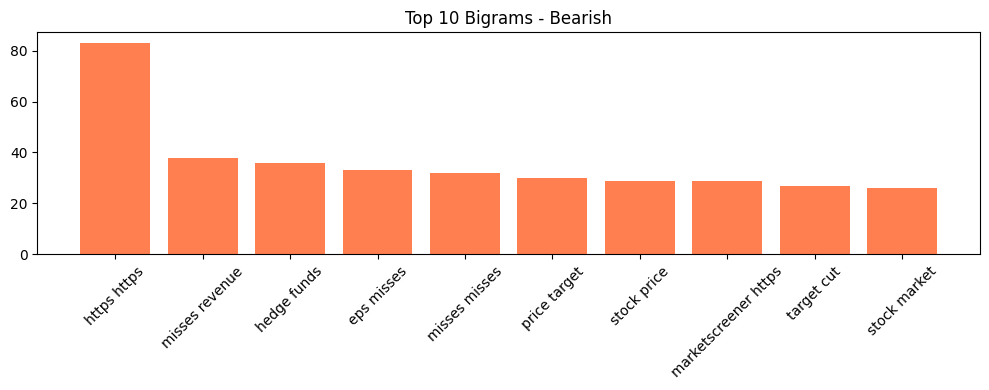

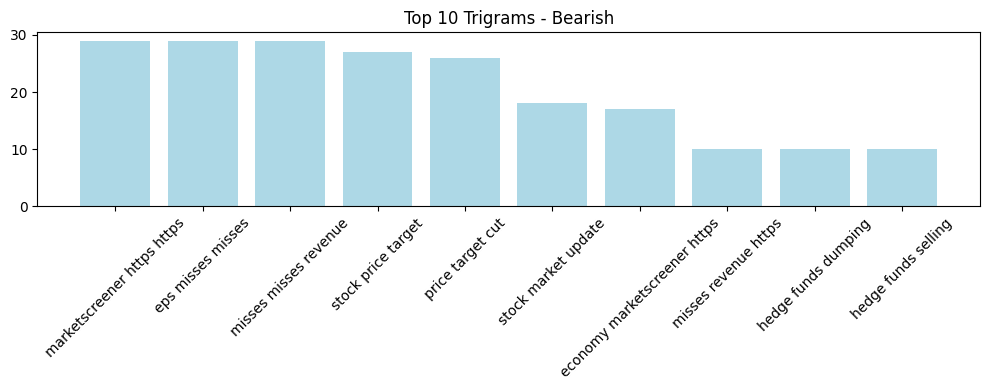

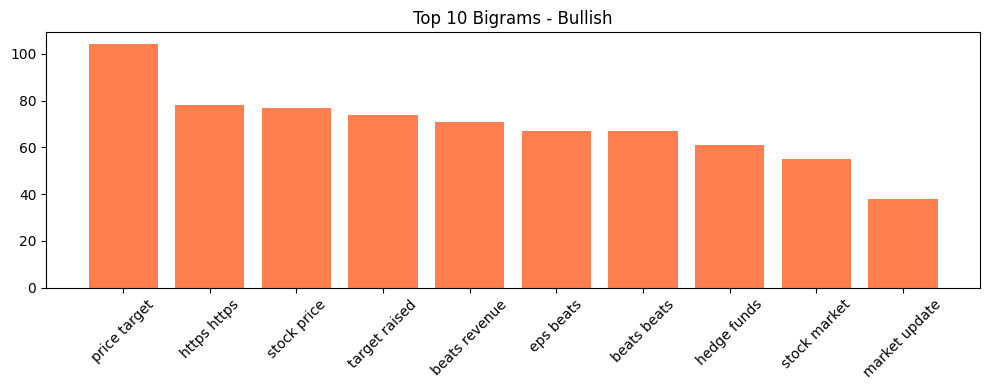

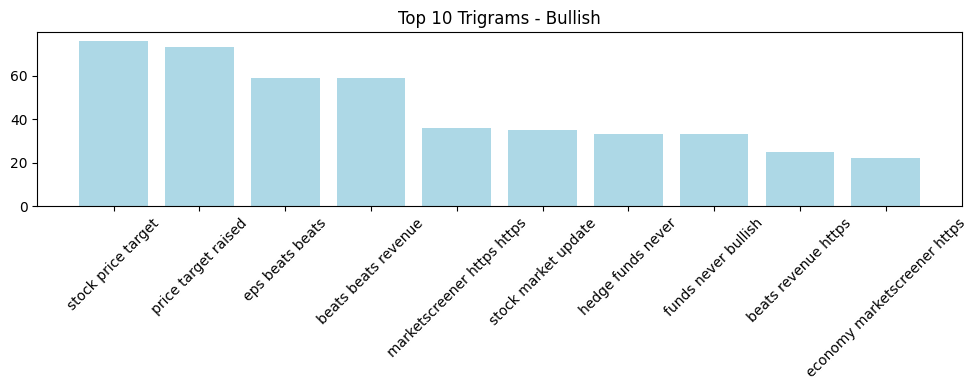

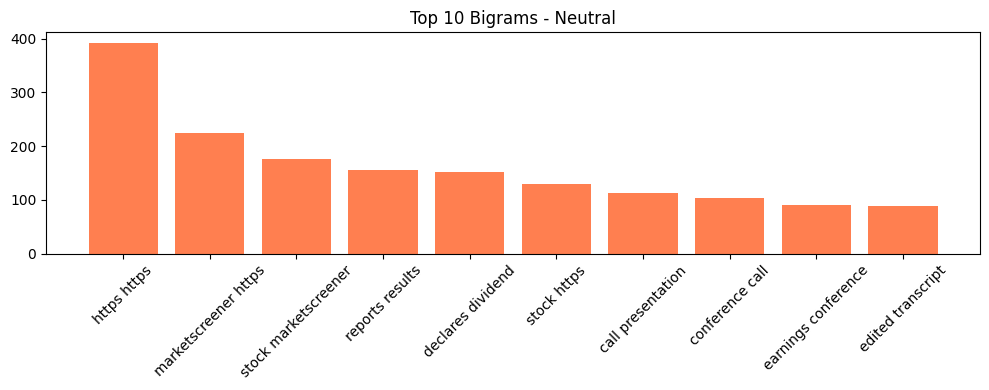

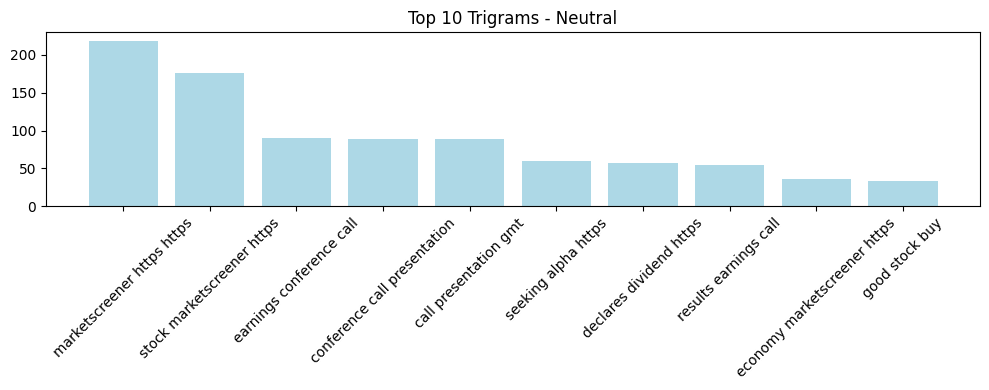

In [ ]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Certifica-te que tens os recursos necessários
nltk.download('punkt')
nltk.download('stopwords')

# Função para gerar e contar n-grams
def top_ngrams(texts, n=2, top_k=10):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    all_ngrams = []
    for text in texts:
        tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
        all_ngrams.extend(list(ngrams(tokens, n)))
    return Counter(all_ngrams).most_common(top_k)

# Mostrar n-grams para cada sentimento
sentiment_labels = {0: "Bearish", 1: "Bullish", 2: "Neutral"}

for label in [0, 1, 2]:
    subset = ds_train[ds_train["label"] == label]["text"]
    bigrams = top_ngrams(subset, n=2, top_k=10)
    trigrams = top_ngrams(subset, n=3, top_k=10)

    # Plotar bigrams
    bigram_labels, bigram_freqs = zip(*[(' '.join(gram), freq) for gram, freq in bigrams])
    plt.figure(figsize=(10, 4))
    plt.bar(bigram_labels, bigram_freqs, color="coral")
    plt.title(f"Top 10 Bigrams - {sentiment_labels[label]}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plotar trigrams
    trigram_labels, trigram_freqs = zip(*[(' '.join(gram), freq) for gram, freq in trigrams])
    plt.figure(figsize=(10, 4))
    plt.bar(trigram_labels, trigram_freqs, color="lightblue")
    plt.title(f"Top 10 Trigrams - {sentiment_labels[label]}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


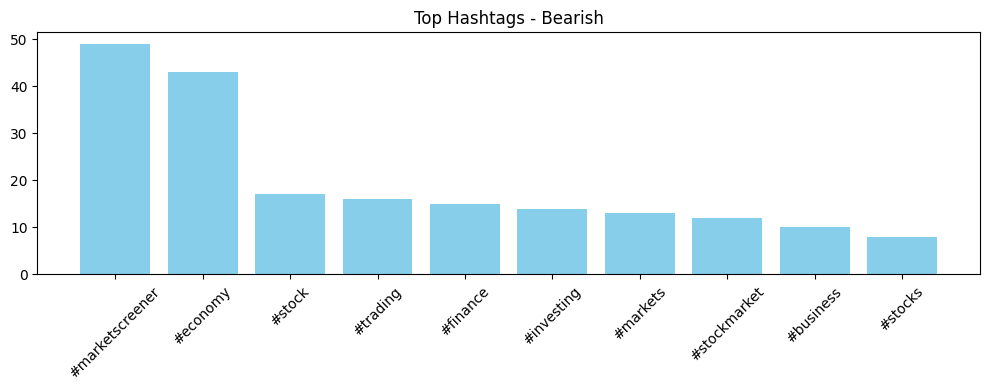

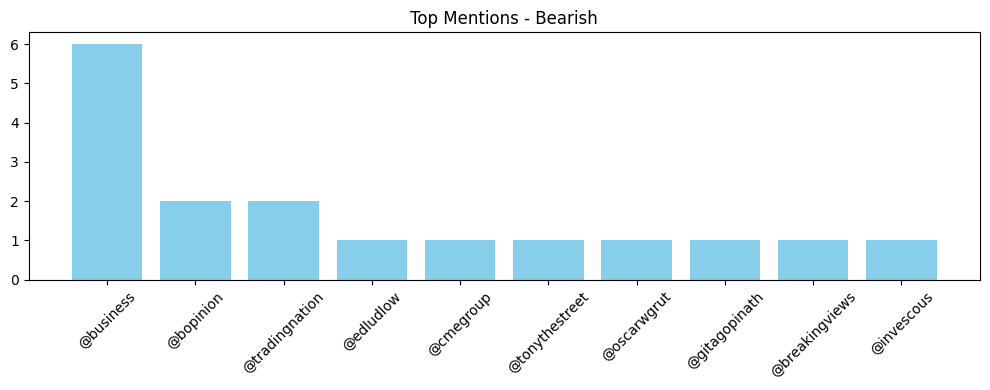

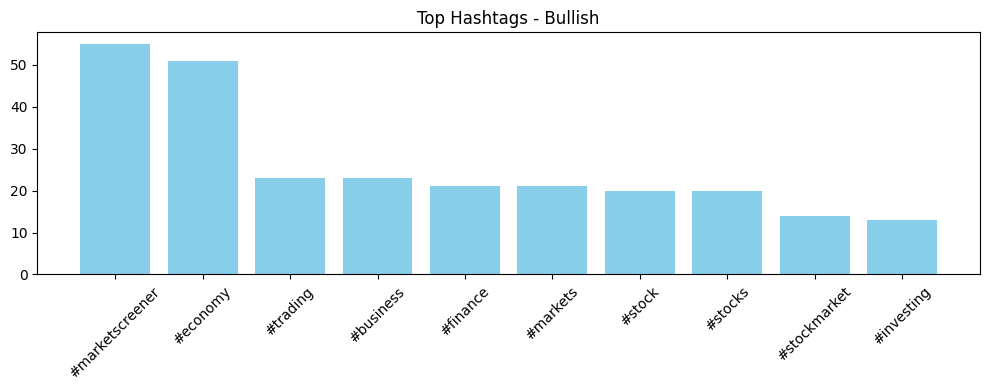

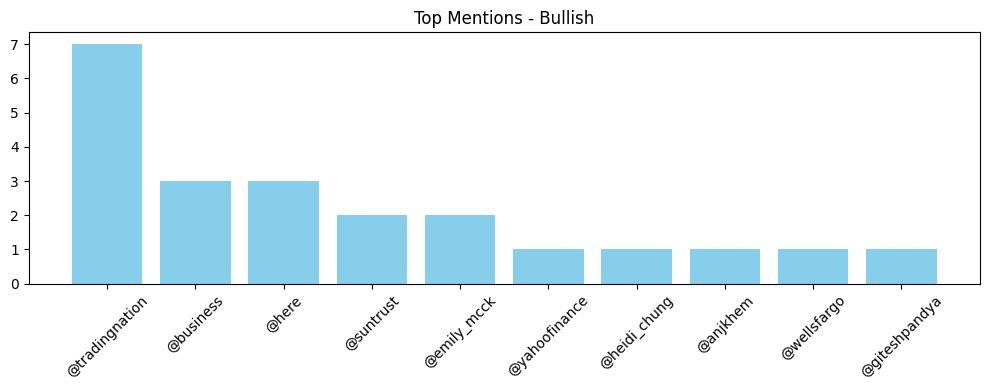

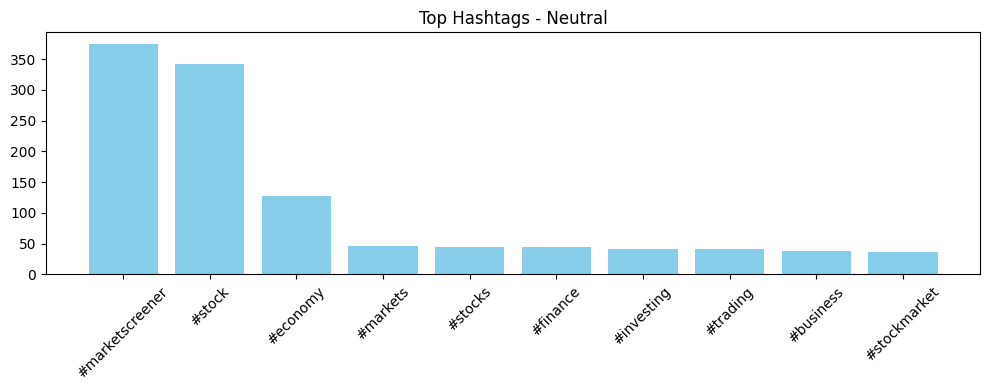

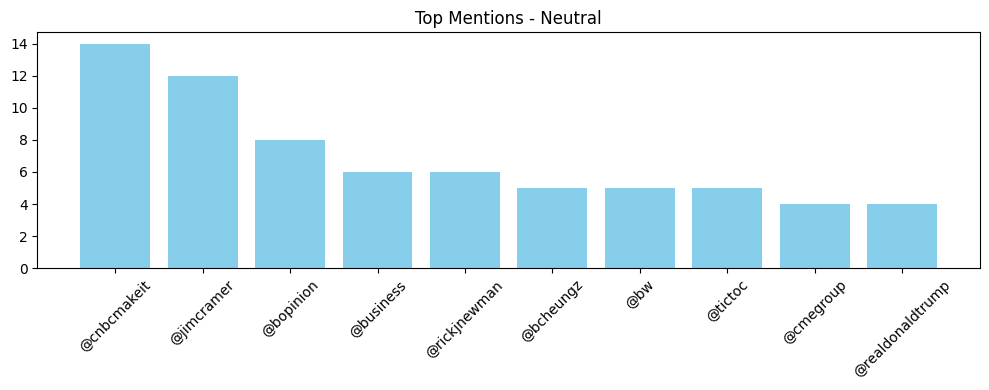

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Função para extrair hashtags ou mentions
def extract_items(texts, pattern):
    items = []
    for text in texts:
        matches = re.findall(pattern, text.lower())
        items.extend(matches)
    return items

# Plotar os N itens mais frequentes (hashtags ou mentions)
def plot_top_items(items, title, top_k=10):
    counter = Counter(items)
    top_items = counter.most_common(top_k)
    labels, counts = zip(*top_items) if top_items else ([], [])

    plt.figure(figsize=(10, 4))
    plt.bar(labels, counts, color="skyblue")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Dicionário com os nomes dos sentimentos
sentiment_labels = {0: "Bearish", 1: "Bullish", 2: "Neutral"}

# Análise por sentimento
for label in [0, 1, 2]:
    texts = ds_train[ds_train["label"] == label]["text"]

    hashtags = extract_items(texts, r"#\w+")
    mentions = extract_items(texts, r"@\w+")

    plot_top_items(hashtags, f"Top Hashtags - {sentiment_labels[label]}")
    plot_top_items(mentions, f"Top Mentions - {sentiment_labels[label]}")


In [ ]:
!git config --global user.name "António Varela"
!git config --global user.email "antonio.varela@sapo.pt"
!git clone https://github.com/Antramos/TextMiningProject2025.git


Cloning into 'TextMiningProject2025'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 2.40 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import shutil

# Copiar o notebook atual com novo nome para a pasta do repositório
shutil.copy("main.ipynb", "TextMiningProject2025/main_v2.ipynb")

print("✅ Notebook copiado como 'main_v2.ipynb' para TextMiningProject2025/")


✅ Notebook copiado como 'main_v2.ipynb' para TextMiningProject2025/


In [ ]:
%cd TextMiningProject2025

!git add main_v2.ipynb
!git commit -m "Adiciona nova versão do notebook como main_v2.ipynb"
!git push origin main


/content/TextMiningProject2025/TextMiningProject2025
[main ad936ca] Adiciona nova versão do notebook como main_v2.ipynb
 1 file changed, 664 insertions(+)
 create mode 100644 main_v2.ipynb
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git config --global user.name "O Teu Nome"
!git config --global user.email "teu.email@example.com"
!git clone https://github.com/Antramos/TextMiningProject2025.git


Cloning into 'TextMiningProject2025'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 2.40 MiB | 6.93 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import shutil

# Copia o notebook com novo nome
shutil.copy("main.ipynb", "TextMiningProject2025/main_v2.ipynb")


FileNotFoundError: [Errno 2] No such file or directory: 'main.ipynb'